In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
import os
#!pip install mat73
#import mat73
import scipy

#################
# Lists all the files in a given repository
list_images = os.listdir("/content/drive/MyDrive/Canais123_Raw/")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Canais123_Raw/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y1 = np.ones(len(dataset_list))
# Creates an X array from the list
X1 = np.array(dataset_list)
X1 = X1.reshape(X1.shape[0], -1)

'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suponha que você tenha uma matriz de dados chamada 'data'
# Padronizar os dados
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X1)

# Inicializar o PCA com o número de componentes desejados
num_components = 2
pca = PCA(n_components=num_components)

# Ajustar o PCA aos dados padronizados e transformá-los para o novo espaço
X_train_new = pca.fit_transform(data_standardized)
'''

X_train_new = X1 #/X1.max()
X_train_new = X_train_new.reshape(X_train_new.shape[0], -1)

print(X_train_new.shape)
print(X_train_new.min()) #é o valor mínimo encontrado na matriz X_train_new após a normalização
print(X_train_new.max()) #é o valor máximo encontrado na matriz X_train_new após a normalização




# remover outliers

'''
# Calculate Q1 and Q3
Q1 = np.percentile(X_train_new, 25, axis=0)
Q3 = np.percentile(X_train_new, 75, axis=0)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outlier indices
outlier_indices = np.where((X_train_new < lower_limit) | (X_train_new > upper_limit))

# Remove outliers
X_train_no_outliers = np.delete(X_train_new, outlier_indices[0], axis=0)

print("Shape after removing outliers:", X_train_no_outliers.shape)
'''

(1938, 3840)
-2650.9004866837295
2533.184555759634


'\n# Calculate Q1 and Q3\nQ1 = np.percentile(X_train_new, 25, axis=0)\nQ3 = np.percentile(X_train_new, 75, axis=0)\n\n# Calculate IQR\nIQR = Q3 - Q1\n\n# Define outlier limits\nlower_limit = Q1 - 1.5 * IQR\nupper_limit = Q3 + 1.5 * IQR\n\n# Identify outlier indices\noutlier_indices = np.where((X_train_new < lower_limit) | (X_train_new > upper_limit))\n\n# Remove outliers\nX_train_no_outliers = np.delete(X_train_new, outlier_indices[0], axis=0)\n\nprint("Shape after removing outliers:", X_train_no_outliers.shape)\n'

In [ ]:
'''import tensorflow as tf
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
import os
import scipy

#################
# Lists all the files in three given directories
list_images_folder1 = os.listdir("/content/drive/MyDrive/Canais123/P7-T7/")
list_images_folder2 = os.listdir("/content/drive/MyDrive/Canais123/FT9-FT10/")
list_images_folder3 = os.listdir("/content/drive/MyDrive/Canais123/T7-FT9/")

# Combine all the image lists from the three folders
list_images = list_images_folder1 + list_images_folder2 + list_images_folder3

dataset_list = []
for image_name in list_images:
    image_path_folder1 = os.path.join("/content/drive/MyDrive/Canais123/P7-T7/", image_name)
    image_path_folder2 = os.path.join("/content/drive/MyDrive/Canais123/FT9-FT10/", image_name)
    image_path_folder3 = os.path.join("/content/drive/MyDrive/Canais123/T7-FT9/", image_name)

    image_path = image_path_folder1  # Change this based on your desired folder priority
    if not os.path.exists(image_path):
        image_path = image_path_folder2
    if not os.path.exists(image_path):
        image_path = image_path_folder3

    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

# Create corresponding labels for the data
y1 = np.ones(len(dataset_list))  # Change this as needed

# Create an X array from the list
X1 = np.array(dataset_list)
X1 = X1.reshape(X1.shape[0], -1)

# Normalize the data
X_train_new = X1 #/ X1.max()'''

'''
# remover outliers

# Calculate Q1 and Q3
Q1 = np.percentile(X_train_new, 25, axis=0)
Q3 = np.percentile(X_train_new, 75, axis=0)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outlier indices
outlier_indices = np.where((X_train_new < lower_limit) | (X_train_new > upper_limit))

# Remove outliers
X_train_new = np.delete(X_train_new, outlier_indices[0], axis=0)

print("Shape after removing outliers:", X_train_new.shape)'''

print(X_train_new.shape)
print(X_train_new.min())  # Minimum value in the normalized matrix
print(X_train_new.max())  # Maximum value in the normalized matrix


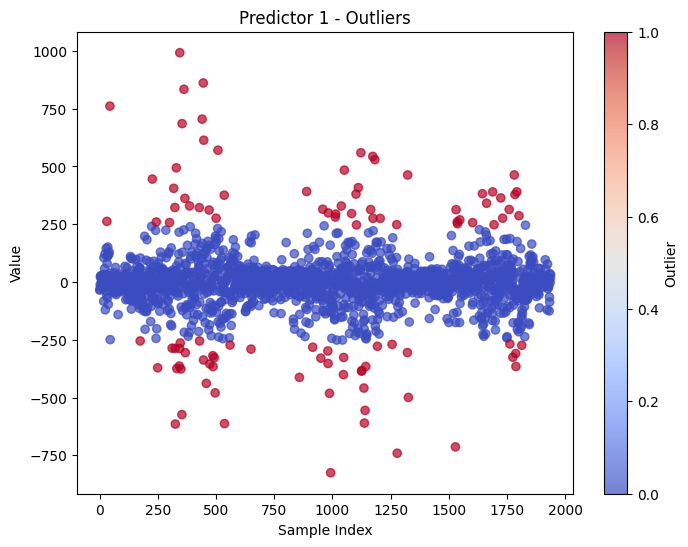

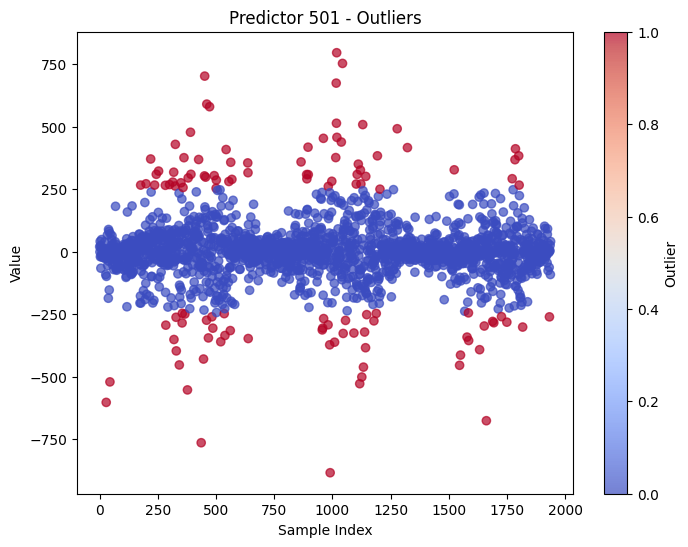

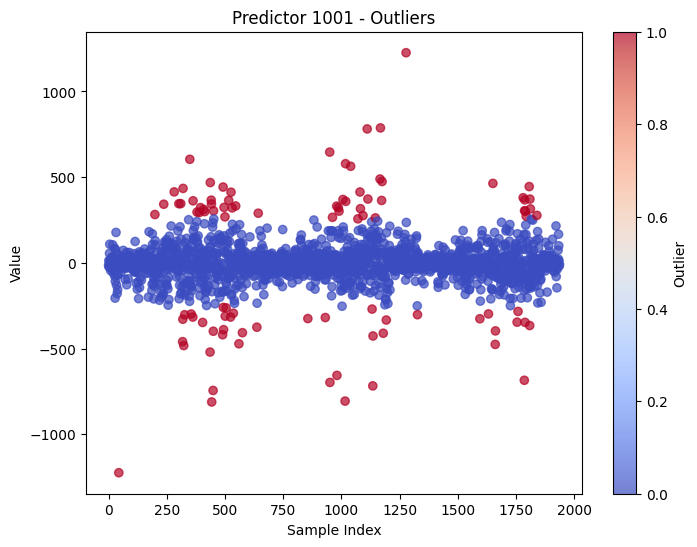

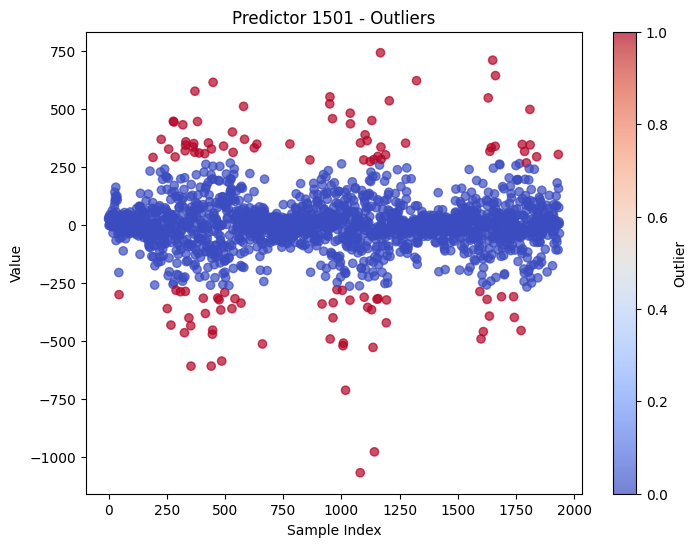

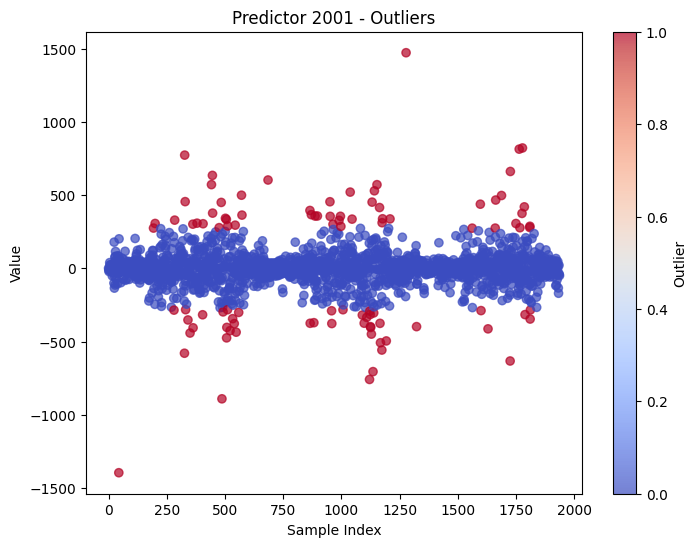

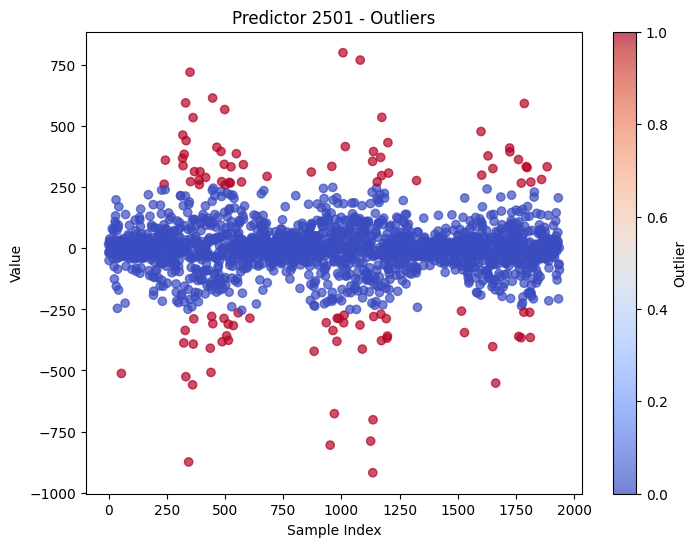

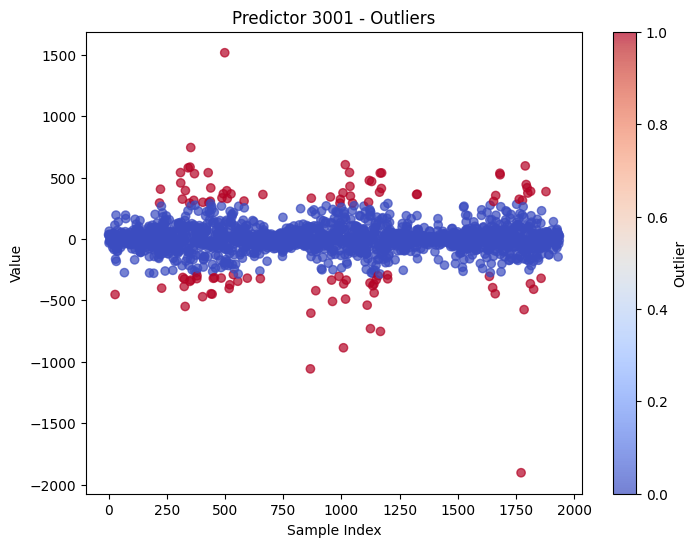

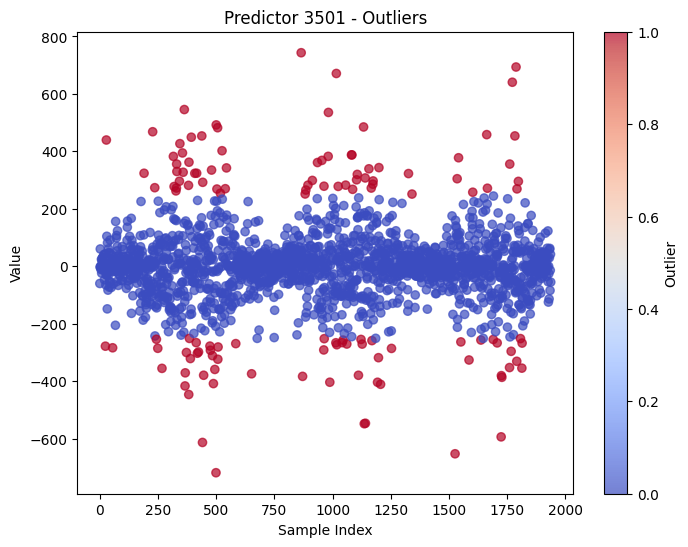

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data and z-scores ready
data = X1# Your 654x3840 data matrix
# Calculate the mean and standard deviation for each predictor
mean_values = np.mean(data, axis=0)
std_dev_values = np.std(data, axis=0)

# Calculate z-scores for each data point
z_scores = (data - mean_values) / std_dev_values

# Set a threshold for z-scores to identify outliers
z_score_threshold = 2.0

# Loop through each predictor
for predictor_index in range(data.shape[1]):
    predictor_data = data[:, predictor_index]
    predictor_z_scores = z_scores[:, predictor_index]

    # Identify outliers
    outliers = np.abs(predictor_z_scores) > z_score_threshold

    if predictor_index in range(0,3840,500):
      # Create a scatter plot
      plt.figure(figsize=(8, 6))
      plt.scatter(np.arange(len(predictor_data)), predictor_data, c=outliers, cmap='coolwarm', alpha=0.7)

      # Customize the plot
      plt.title(f"Predictor {predictor_index + 1} - Outliers")
      plt.xlabel("Sample Index")
      plt.ylabel("Value")
      plt.colorbar(label="Outlier")

      # Show or save the plot
      plt.show()
      # plt.savefig(f"predictor_{predictor_index + 1}_outliers.png")
      # plt.close()


In [ ]:
# Set a threshold for z-scores to identify outliers
z_score_threshold = 3.0

# Find indices of outliers
outlier_indices = np.where(np.abs(z_scores) > z_score_threshold)

# Remove outliers from the data
cleaned_data = data.copy()  # Create a copy to preserve original data
cleaned_data[outlier_indices] = np.nan  # Replace outliers with NaN

# Optionally, you can choose to fill NaNs with median or other appropriate values
cleaned_data = np.where(np.isnan(cleaned_data), np.nanmedian(cleaned_data, axis=0), cleaned_data)

# Now 'cleaned_data' contains the data with outliers replaced by NaNs

# You can proceed with further analysis using the 'cleaned_data'.
print(cleaned_data.min())
print(cleaned_data.max())
print(cleaned_data.mean())
print(cleaned_data.shape)

#plota os novos dados
# # Calculate the mean and standard deviation for each predictor
# mean_values = np.mean(cleaned_data, axis=0)
# std_dev_values = np.std(cleaned_data, axis=0)

# # Calculate z-scores for each data point
# z_scores = (cleaned_data - mean_values) / std_dev_values

# # Set a threshold for z-scores to identify outliers
# z_score_threshold = 3.0

# # Loop through each predictor
# for predictor_index in range(cleaned_data.shape[1]):
#     predictor_data = cleaned_data[:, predictor_index]
#     predictor_z_scores = z_scores[:, predictor_index]

#     # Identify outliers
#     outliers = np.abs(predictor_z_scores) > z_score_threshold

#     if predictor_index in range(0,3840,500):
#       # Create a scatter plot
#       plt.figure(figsize=(8, 6))
#       plt.scatter(np.arange(len(predictor_data)), predictor_data, c=outliers, cmap='coolwarm', alpha=0.7)

#       # Customize the plot
#       plt.title(f"Predictor {predictor_index + 1} - Outliers")
#       plt.xlabel("Sample Index")
#       plt.ylabel("Value")
#       plt.colorbar(label="Outlier")

#       # Show or save the plot
#       plt.show()
#       # plt.savefig(f"predictor_{predictor_index + 1}_outliers.png")
#       # plt.close()

-464.98106870669227
468.37628027638135
-0.20004125539849357
(1938, 3840)


In [ ]:
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, Lambda, BatchNormalization, Dropout, Flatten, Reshape, Conv1DTranspose, Conv1D, Conv2D
from keras.layers import LeakyReLU
from keras.models import Model
from keras.losses import binary_crossentropy
import matplotlib.pyplot as plt
from keras.initializers import VarianceScaling, he_normal, glorot_uniform

# Assuming you have your 1D data with 3840 values each
num_samples = X_train_new.shape[0]
num_values = X_train_new.shape[1]

# VAE parameters
latent_dim = 100

# Define the latent space sampling function
def compute_latent(args):
    mu, sigma = args
    batch = K.shape(mu)[0]
    dim = latent_dim
    eps = K.random_normal(shape=(batch, dim))
    return mu + K.exp(sigma / 2) * eps

In [ ]:

# Define the VAE architecture

#encoder

inputs = Input(shape=(num_values, ))

encoder = Dense(512, activation=LeakyReLU(alpha=0.1), kernel_initializer=VarianceScaling(scale=1.5))(inputs)
#encoder = BatchNormalization()(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Dense(256, activation="tanh")(encoder)
#encoder = BatchNormalization()(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Dense(128, activation="relu", kernel_initializer=he_normal())(encoder)
#encoder = BatchNormalization()(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Dense(64, activation="tanh", kernel_initializer=glorot_uniform())(encoder)
#encoder = BatchNormalization()(encoder)
encoder = Dropout(0.3)(encoder)
'''
encoder = Dense(32, activation="tanh", kernel_initializer=VarianceScaling(scale=1.5))(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Dense(16, activation="relu", kernel_initializer=he_normal())(encoder)

encoder = Dense(8, activation="tanh")(encoder)'''

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent)([mu, sigma])


# decoder

decoder_input = Input(shape=(latent_dim,))
'''
decoder = Dense(8, activation="sigmoid")(decoder_input)
#decoder = BatchNormalization()(decoder)
decoder = Dropout(0.3)(decoder)

decoder = Dense(16, activation="tanh")(decoder)
decoder = Dropout(0.3)(decoder)

decoder = Dense(32, activation="tanh")(decoder)'''

decoder = Dense(64, activation="sigmoid", kernel_initializer=glorot_uniform())(decoder_input)

decoder = Dense(128, activation="tanh", kernel_initializer=glorot_uniform())(decoder)
#decoder = BatchNormalization()(decoder)
decoder = Dropout(0.3)(decoder)

decoder = Dense(256, activation=LeakyReLU(alpha=0.1), kernel_initializer=VarianceScaling(scale=2.0))(decoder) #sigmoid
#decoder = BatchNormalization()(decoder)
decoder = Dropout(0.3)(decoder)

decoder_output = Dense(num_values, activation="tanh")(decoder)



In [ ]:
# tentativa (falha) de implementar esse código https://github.com/krishk97/ECE-C247-EEG-GAN/blob/master/VAE_CNN.ipynb

'''


filters = 16
filters *= 2

inputs = Input(shape=(num_samples, num_values, 1))
print(inputs)

#Temporal conv
encoder = Conv2D(filters=filters, kernel_size=(1, 50), strides=(1,25))(inputs)
encoder = LeakyReLU(alpha=0.3)(encoder)

#Spatial Conv
encoder = Conv2D(filters=filters, kernel_size=(22, 1))(encoder)
encoder = LeakyReLU(alpha=0.3)(encoder)

#shape info needed to build decoder model
shape = K.int_shape(encoder)

#latent vector Q(z|X)
encoder = Flatten()(encoder)
encoder = Dense(16, activation='relu')(encoder)


mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent)([mu, sigma])



#decoder model

decoder_input = Input(shape=(latent_dim,), name='z_sampling')



decoder = Dense(shape[1] * shape[2] * shape[3], activation='relu')(decoder_input)
decoder = Reshape((shape[1], shape[2], shape[3]))(decoder)

#reverse: spatial conv
decoder = Conv2DTranspose(filters=filters, kernel_size=(22, 1), activation='relu')(decoder)
#x = BatchNormalization(epsilon=1e-5)(x)

filters //= 2

#reverse: temporal conv
decoder = Conv2DTranspose(filters=filters, kernel_size=(1, 50), activation='relu', strides=(1,25))(decoder)
#x = BatchNormalization(epsilon=1e-5)(x)

filters //= 2

decoder_output = Conv2DTranspose(filters=1, kernel_size=7, padding='same', name='decoder_output')(decoder)

'''

"\n\n\nfilters = 16\nfilters *= 2\n\ninputs = Input(shape=(num_samples, num_values, 1))\nprint(inputs)\n\n#Temporal conv\nencoder = Conv2D(filters=filters, kernel_size=(1, 50), strides=(1,25))(inputs)\nencoder = LeakyReLU(alpha=0.3)(encoder)\n\n#Spatial Conv\nencoder = Conv2D(filters=filters, kernel_size=(22, 1))(encoder)\nencoder = LeakyReLU(alpha=0.3)(encoder)\n\n#shape info needed to build decoder model\nshape = K.int_shape(encoder)\n\n#latent vector Q(z|X)\nencoder = Flatten()(encoder)\nencoder = Dense(16, activation='relu')(encoder)\n\n\nmu = Dense(latent_dim)(encoder)\nsigma = Dense(latent_dim)(encoder)\n\nlatent_space = Lambda(compute_latent)([mu, sigma])\n\n\n\n#decoder model\n\ndecoder_input = Input(shape=(latent_dim,), name='z_sampling')\n\n\n\ndecoder = Dense(shape[1] * shape[2] * shape[3], activation='relu')(decoder_input)\ndecoder = Reshape((shape[1], shape[2], shape[3]))(decoder)\n\n#reverse: spatial conv\ndecoder = Conv2DTranspose(filters=filters, kernel_size=(22, 1), ac

In [ ]:
# tentativa (falha) de implementar uma arquitetura parecida com a dcgan desse artigo: https://sci-hub.se/10.1109/icpr48806.2021.9413119

'''

#encoder

inputs = Input(shape=(num_values, ))

encoder = Reshape((num_values, 1))(inputs)
encoder = Conv1D(32, kernel_size=10, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Conv1D(32, kernel_size=20, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Conv1D(32, kernel_size=30, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Conv1D(32, kernel_size=40, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)
encoder = Dropout(0.3)(encoder)

encoder = Flatten()(encoder)

#encoder = Dense(100, activation=LeakyReLU(alpha=2.0))(encoder)

#encoder = Dense(2 * latent_dim)(encoder)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent)([mu, sigma])



decoder_input = Input(shape=(latent_dim,))

#decoder = Dense(100, activation="relu")(decoder_input)

decoder = Dense(32 * ((num_values - 10 + 1) // 2 // 2 // 2 // 2), activation='relu')(decoder_input)

decoder = Reshape((32, ((num_values - 10 + 1) // 2 // 2 // 2 // 2)))(decoder)

decoder = Conv1DTranspose(32, kernel_size=40, strides=2, padding='same', activation='relu')(decoder)

decoder = Conv1DTranspose(32, kernel_size=30, strides=2, padding='same', activation='relu')(decoder)

decoder = Conv1DTranspose(32, kernel_size=20, strides=2, padding='same', activation='relu')(decoder)

decoder = Conv1DTranspose(32, kernel_size=10, strides=2, padding='same', activation='relu')(decoder)

decoder_output = Conv1DTranspose(1, kernel_size=10, strides=2, padding='same', activation='sigmoid')(decoder)
'''

'\n\n#encoder\n\ninputs = Input(shape=(num_values, ))\n\nencoder = Reshape((num_values, 1))(inputs)\nencoder = Conv1D(32, kernel_size=10, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)\nencoder = Dropout(0.3)(encoder)\n\nencoder = Conv1D(32, kernel_size=20, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)\nencoder = Dropout(0.3)(encoder)\n\nencoder = Conv1D(32, kernel_size=30, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)\nencoder = Dropout(0.3)(encoder)\n\nencoder = Conv1D(32, kernel_size=40, strides=2, activation=LeakyReLU(alpha=0.2))(encoder)\nencoder = Dropout(0.3)(encoder)\n\nencoder = Flatten()(encoder)\n\n#encoder = Dense(100, activation=LeakyReLU(alpha=2.0))(encoder)\n\n#encoder = Dense(2 * latent_dim)(encoder)\n\nmu = Dense(latent_dim)(encoder)\nsigma = Dense(latent_dim)(encoder)\n\nlatent_space = Lambda(compute_latent)([mu, sigma])\n\n\n\ndecoder_input = Input(shape=(latent_dim,))\n\n#decoder = Dense(100, activation="relu")(decoder_input)\n\ndecoder = Dense(3

In [ ]:

# Create the encoder model
encoder_model = Model(inputs, latent_space)

# Create the decoder model
decoder_model = Model(decoder_input, decoder_output)

encoder_model.summary()
decoder_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 3840)]       0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 512)          1966592     ['input_5[0][0]']                
                                                                                                  
 dropout_18 (Dropout)           (None, 512)          0           ['dense_32[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 256)          131328      ['dropout_18[0][0]']             
                                                                                            

In [ ]:
# Create the VAE model
vae_output = decoder_model(latent_space)
vae = Model(inputs, vae_output)

# Reconstruction loss (binary cross-entropy)
reconstruction_loss = binary_crossentropy(inputs, vae_output) * num_values

# KL divergence loss
kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

# Total loss = Reconstruction loss + KL divergence loss
total_loss = K.mean(reconstruction_loss + kl_loss)

# Compile the VAE model
vae.add_loss(total_loss)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# e_s = EarlyStopping(monitor='loss', patience=50)
#m_c = ModelCheckpoint(r'C:\Users\ufpa\PycharmProjects\GAN\VAE\vae_funcionando_RAW.hdf5', save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=25)
early_stopping = EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True)


# NORMALIZAÇÃO

X_train_new = X1 / X1.max()

# Train the VAE model
history = vae.fit(X_train_new, epochs=500, batch_size=20, validation_split=0.2, callbacks=[reduce_lr, early_stopping], verbose=1, shuffle=True)


Epoch 1/500
78/78 [==============================] - 9s 51ms/step - loss: 96.5397 - val_loss: 11.6610 - lr: 1.0000e-04
Epoch 2/500
78/78 [==============================] - 4s 47ms/step - loss: 39.5359 - val_loss: 3.5442 - lr: 1.0000e-04
Epoch 3/500
78/78 [==============================] - 5s 67ms/step - loss: 26.7355 - val_loss: 1.7210 - lr: 1.0000e-04
Epoch 4/500
78/78 [==============================] - 4s 46ms/step - loss: 19.6138 - val_loss: 0.8409 - lr: 1.0000e-04
Epoch 5/500
78/78 [==============================] - 4s 45ms/step - loss: 15.3223 - val_loss: 0.5154 - lr: 1.0000e-04
Epoch 6/500
78/78 [==============================] - 4s 49ms/step - loss: 12.9592 - val_loss: 0.3408 - lr: 1.0000e-04
Epoch 7/500
78/78 [==============================] - 5s 61ms/step - loss: 11.1215 - val_loss: 0.3208 - lr: 1.0000e-04
Epoch 8/500
78/78 [==============================] - 4s 48ms/step - loss: 9.5738 - val_loss: 0.2919 - lr: 1.0000e-04
Epoch 9/500
78/78 [==============================] - 4s 

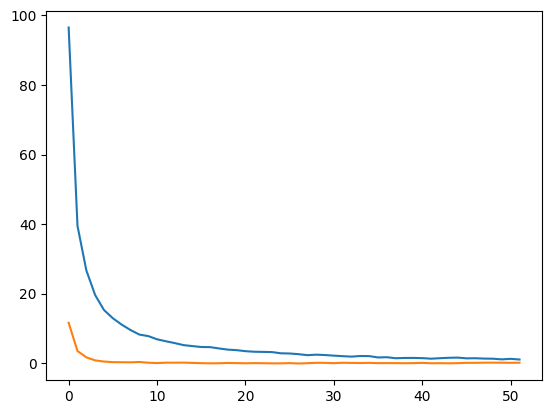

In [ ]:
# Plotting loss value decrease
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_RAW.png')
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_RAW.pdf')
plt.show()

# # Displaying images in latent space
# encoded_train = encoder_model.predict(X_train_new)
# plt.figure(figsize=(8,8))
# plt.scatter(encoded_train[:,0], encoded_train[:,1], s=2, c=y1, cmap='jet')
# plt.colorbar()
# plt.grid()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_latentSpace_RAW.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_latentSpace_RAW.pdf')
# plt.show()



In [ ]:
import numpy as np

# Define a function to generate new samples from the trained VAE model
def generate_samples(vae_model, num_samples, latent_dim):
    # Generate random samples in the latent space
    random_latent_vectors = np.random.random(size=(num_samples, latent_dim))

    # Decode the random latent vectors using the decoder part of the VAE
    generated_samples = vae_model.predict(random_latent_vectors)

    return generated_samples

# Generate new samples
num_generated_samples = X_train_new.shape[0]  # Adjust this as needed
generated_samples = generate_samples(decoder_model, num_generated_samples, latent_dim)
print(generated_samples.min())
print(generated_samples.max())

#gen_sample = 2*((generated_samples-generated_samples.min())/(generated_samples.max()-generated_samples.min()))-1
#print(gen_sample.min())
#print(gen_sample.max())

# np.save('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_RAW_12_08.npy', gen_sample)
# import scipy.io
# scipy.io.savemat('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/vae_funcionando_RAW_12_08.mat', {"generated_samples":gen_sample})


61/61 [==============================] - 0s 5ms/step
-0.41299406
0.060813997


In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt

# Supondo que você já tenha seus dados reais e dados gerados
# Substitua real_data e generated_data pelos seus dados reais e gerados

# Crie histogramas
plt.figure(figsize=(10, 5))

# Histograma para os dados reais
plt.subplot(1, 2, 1)
plt.hist(X_train_new.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Histograma dos Dados Reais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Histograma para os dados gerados
plt.subplot(1, 2, 2)
plt.hist(generated_samples.flatten(), bins=20, color='orange', alpha=0.7)
plt.title('Histograma dos Dados Gerados')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
'''

"import numpy as np\nimport matplotlib.pyplot as plt\n\n# Supondo que você já tenha seus dados reais e dados gerados\n# Substitua real_data e generated_data pelos seus dados reais e gerados\n\n# Crie histogramas\nplt.figure(figsize=(10, 5))\n\n# Histograma para os dados reais\nplt.subplot(1, 2, 1)\nplt.hist(X_train_new.flatten(), bins=20, color='blue', alpha=0.7)\nplt.title('Histograma dos Dados Reais')\nplt.xlabel('Valor')\nplt.ylabel('Frequência')\n\n# Histograma para os dados gerados\nplt.subplot(1, 2, 2)\nplt.hist(generated_samples.flatten(), bins=20, color='orange', alpha=0.7)\nplt.title('Histograma dos Dados Gerados')\nplt.xlabel('Valor')\nplt.ylabel('Frequência')\n\nplt.tight_layout()\nplt.show()\n"

61/61 [==============================] - 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Real Data Cluster Counts: [978 960]
Generated Data Cluster Counts: [978 960]


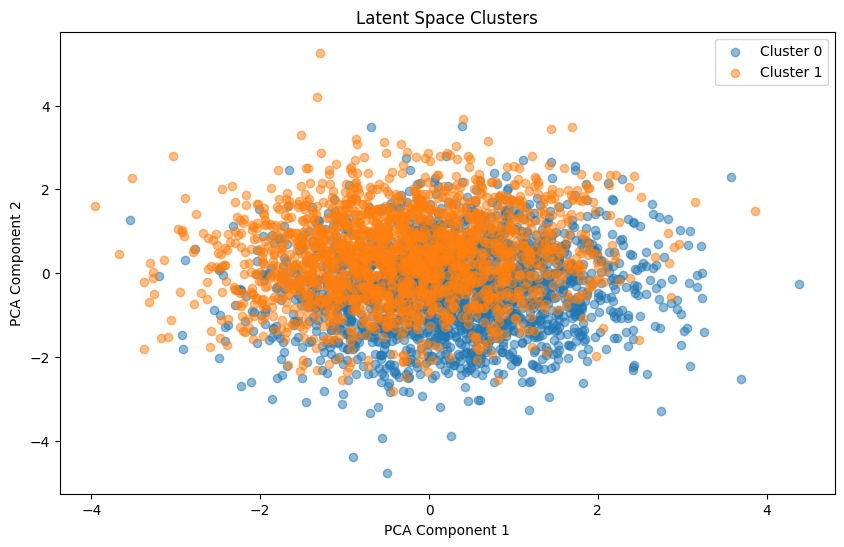

In [ ]:
# Generate latent representations for real data
real_latent = encoder_model.predict(X_train_new)

# Generate latent representations for generated data
generated_latent = encoder_model.predict(generated_samples)

from sklearn.cluster import KMeans
# Combine real and generated latent representations
all_latent = np.concatenate((real_latent, generated_latent), axis=0)

# Apply K-Means clustering
num_clusters = 2  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(all_latent)
# Separate cluster assignments for real and generated data
real_clusters = clusters[:len(real_latent)]
generated_clusters = clusters[len(real_latent):]

# Calculate the distribution of clusters in real and generated data
real_cluster_counts = np.bincount(real_clusters, minlength=num_clusters)
generated_cluster_counts = np.bincount(generated_clusters, minlength=num_clusters)

print("Real Data Cluster Counts:", real_cluster_counts)#Real Data Cluster Counts: [325 329] eram bns resultados
print("Generated Data Cluster Counts:", generated_cluster_counts)#Generated Data Cluster Counts: [335 319]

from sklearn.decomposition import PCA
# Perform PCA for visualization in 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_latent)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    plt.scatter(
        pca_result[clusters == cluster_id, 0],
        pca_result[clusters == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.5
    )

plt.title('Latent Space Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


61/61 [==============================] - 1s 12ms/step


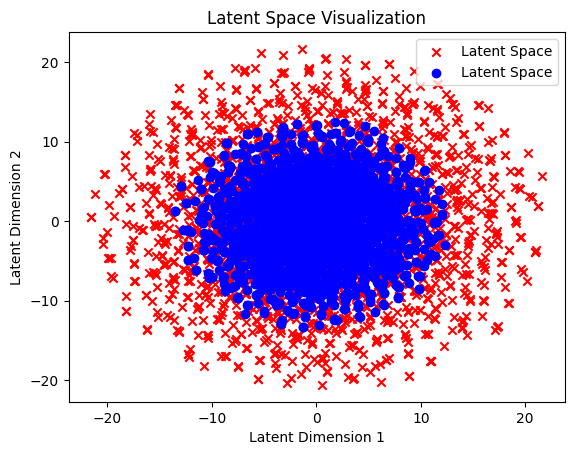

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract latent representations
latent_points = encoder_model.predict(X_train_new)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
latent_tsne = tsne.fit_transform(latent_points)

# Extract latent representations
latent_pointsS = encoder_model.predict(generated_samples)

# Apply t-SNE for visualization
tsneS = TSNE(n_components=2, perplexity=30, random_state=42)
latent_tsneS = tsne.fit_transform(latent_pointsS)

# Plot the latent space
plt.scatter(latent_tsneS[:, 0], latent_tsneS[:, 1], c='r', marker='x', label='Latent Space')
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c='b', marker='o', label='Latent Space')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Visualization')
plt.legend()
plt.show()

WilcoxonResult(statistic=56495069613.0, pvalue=0.0)
0.18073932822504205


Text(0.5, 1.0, 'Train')

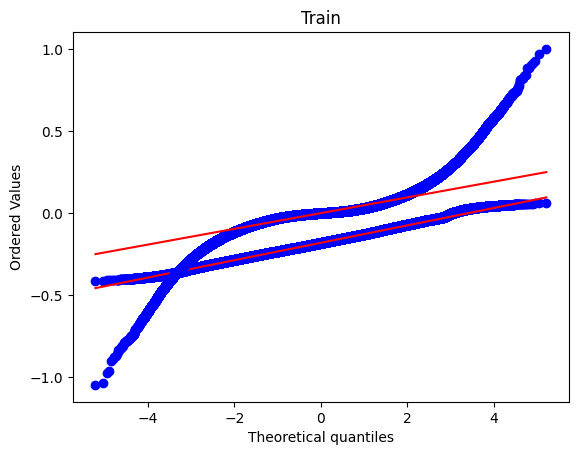

In [ ]:
from scipy.stats import wilcoxon,probplot
res = wilcoxon(X_train_new.flatten(), generated_samples.flatten())
print(res)
from scipy.stats import wasserstein_distance
wasser = wasserstein_distance(X_train_new.flatten(), generated_samples.flatten())
print(wasser)

probplot(generated_samples.flatten(), plot=plt)
plt.title("Generated")

probplot(X_train_new.flatten(), plot=plt)
plt.title("Train")

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels
from scipy.linalg import sqrtm

# Function to compute the KID score
def compute_kid(real_data, generated_data, kernel='rbf', gamma=None):
    if kernel == 'rbf':
        kernel_function = pairwise_kernels(real_data, generated_data, metric='rbf', gamma=gamma)
    else:
        raise ValueError("Unsupported kernel type.")

    m = real_data.shape[0]
    n = generated_samples.shape[0]

    # Calculate the kernel mean discrepancy (KMD) using unbiased estimator
    kid = (np.sum(kernel_function) - m - n + 2 * np.sum(np.diag(kernel_function))) / (m * n)

    return kid

# Calculate KID score
kid_score = compute_kid(X_train_new, generated_samples)

print(f"Kernel Inception Distance (KID): {kid_score:.4f}")


Kernel Inception Distance (KID): 0.9626


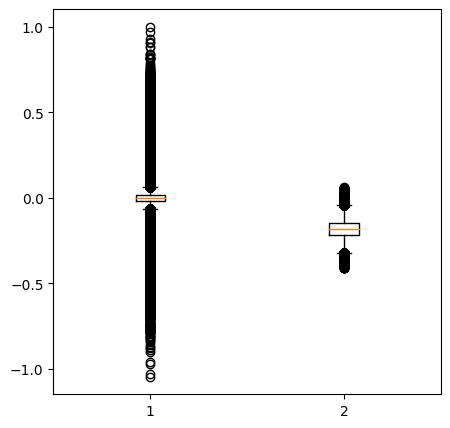

In [ ]:
fig = plt.figure(figsize =(5, 5))
 # Creating plot
plt.boxplot([X_train_new.flatten(), generated_samples.flatten()])
# show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


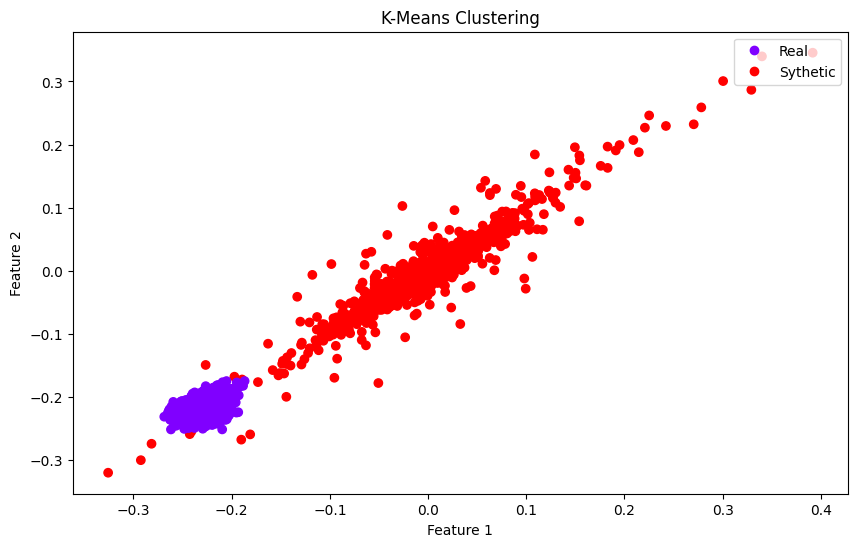

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# # Generate example dataset (replace this with your actual data)
# # Assuming you have a dataset of size 1308x3840
# num_samples = 1308
# num_features = 3840

# # Generate random data for demonstration purposes
# np.random.seed(42)
data = np.concatenate((X_train_new, generated_samples), axis=0)
# Specify the number of clusters
num_clusters = 2  # You can adjust this number

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='rainbow')
# plt.title("K-Means Clustering")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# legend_labels = ["Real","Sythetic"]
# plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right')
# plt.show()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Add legend
legend_labels = ["Real","Sythetic"]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right')

plt.show()

Pegar uma mesma arquitetura de classificação, treinar com o dado real e com o dado artificial. ver se tem a mesma acc, sob mesmas condições

https://github.com/arkanivasarkar/EEG-Data-Augmentation-using-Variational-Autoencoder/blob/main/EEGNet%20for%20motor-imagery%20classification.ipynb


#CRIANDO A BASE MULTICLASSE REAL#

In [ ]:
#################
import scipy

# Lists all the files in a given repository
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/AFTER")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/AFTER/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y1 = np.ones(len(dataset_list))
# Creates an X array from the list
X = np.array(dataset_list)
X1 = X.reshape((len(dataset_list), 3840))
print(X1.shape)

########
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/FAR")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/FAR/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y2 = np.ones(len(dataset_list))*2
# Creates an X array from the list
X = np.array(dataset_list)
X2 = X.reshape((len(dataset_list), 3840))
print(X2.shape)

########
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/BEFORE")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/BEFORE/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y3 = np.ones(len(dataset_list))*3
# Creates an X array from the list
X = np.array(dataset_list)
X3 = X.reshape((len(dataset_list), 3840))
print(X3.shape)

########
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/raw_F7-T7")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/raw_F7-T7/" + image_name
    image = mat73.loadmat(image_path)['signal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y4 = np.ones(len(dataset_list))*4
# Creates an X array from the list
X4 = np.array(dataset_list)
print(X4.shape)

########

X = np.concatenate((X1,X2,X3,X4),axis=0)
Y_train = np.concatenate((y1,y2,y3,y4),axis=0)

X_train_new = X/X.max()
print(X_train_new.shape)
print(X_train_new.min())
print(X_train_new.max())

FileNotFoundError: ignored

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/baseDados_Relatorio_Real.npy', {"X_train_new":X_train_new, "Y_train":Y_train})
import scipy.io
scipy.io.savemat('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/baseDados_Relatorio_Real.mat', {"X_train_new":X_train_new, "Y_train":Y_train})

# RANDOM FOREST #

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data and labels loaded as 'data' and 'labels'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_new, Y_train, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# 1D CONVOLUTIONAL COM DADO REAL #

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


# Assuming you have your data and labels loaded as 'data' and 'labels'
num_samples = len(Y_train)
num_predictors = 3840
num_classes = 4

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_new, Y_train, test_size=0.1, random_state=42)

# Convert labels to one-hot encoded vectors
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

# Initialize the CNN model
model = Sequential([
    Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(num_predictors, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define ModelCheckpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)


# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["PR","NI","PO","IC"])

cm_display.plot()
plt.show()




#CRIANDO A BASE MULTICLASSE FALSA

In [ ]:
#################
import scipy

# Lists all the files in a given repository
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/AFTER")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/AFTER/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y1 = np.ones(len(dataset_list))
# Creates an X array from the list
X = np.array(dataset_list)
X1 = X.reshape((len(dataset_list), 3840))
print(X1.shape)

########
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/FAR")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/FAR/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y2 = np.ones(len(dataset_list))*2
# Creates an X array from the list
X = np.array(dataset_list)
X2 = X.reshape((len(dataset_list), 3840))
print(X2.shape)

########
list_images = os.listdir("/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/BEFORE")#[:10]
dataset_list = []
# Reads each one of them
for image_name in list_images:

    image_path = "/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/dados/Raw/Sem_seizure/BEFORE/" + image_name
    image = scipy.io.loadmat(image_path)['arq_canal']
    # Saves the image into a list
    dataset_list.append(np.asarray(image).tolist())

y3 = np.ones(len(dataset_list))*3
# Creates an X array from the list
X = np.array(dataset_list)
X3 = X.reshape((len(dataset_list), 3840))
print(X3.shape)

########
y4 = np.ones(len(gen_sample))*4
# Creates an X array from the list
X4 = gen_sample
print(X4.shape)

########

X = np.concatenate((X1,X2,X3,X4),axis=0)
Y_train = np.concatenate((y1,y2,y3,y4),axis=0)

X_train_newF = X/X.max()
print(X_train_new.shape)
print(X_train_new.min())
print(X_train_new.max())

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/baseDados_Relatorio_Fake.npy', {"X_train_new":X_train_newF, "Y_train":Y_train})
import scipy.io
scipy.io.savemat('/content/drive/MyDrive/Colab Notebooks/VAE_Gabriel/baseDados_Relatorio_Fake.mat', {"X_train_new":X_train_newF, "Y_train":Y_train})

# 1D CONVOLUTIONAL COM DADO FALSO #

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


# Assuming you have your data and labels loaded as 'data' and 'labels'
num_samples = len(Y_train)
num_predictors = 3840
num_classes = 4

# Split the data into training and testing sets
X_trainF, X_testF, y_trainF, y_testF = train_test_split(X_train_newF, Y_train, test_size=0.1, random_state=42)

# Convert labels to one-hot encoded vectors
label_binarizer = LabelBinarizer()
y_trainF = label_binarizer.fit_transform(y_trainF)
y_testF = label_binarizer.transform(y_testF)

# Initialize the CNN model
model = Sequential([
    Conv1D(filters=256, kernel_size=7, activation='relu', input_shape=(num_predictors, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define ModelCheckpoint and EarlyStopping callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)


# Train the model
model.fit(X_trainF, y_trainF, epochs=100, batch_size=32, validation_split=0.2,callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test data
y_pred = model.predict(X_testF)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_testF, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy fake test:", accuracy)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

####################
# Evaluate the model on the real test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy real test:", accuracy)
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)




In [ ]:
####################
# Evaluate the model on the real test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy real test:", accuracy)
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["PR","NI","PO","IC"])

cm_display.plot()
plt.show()

In [ ]:
# Evaluate the model on the test data
y_pred = model.predict(X_testF)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_testF, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy fake test:", accuracy)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["PR","NI","PO","IC"])

cm_display.plot()
plt.show()